<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
%matplotlib inline

In [ ]:
np.random.seed(0)

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Well...
df.index = df.Name
df.filter(like='Rosa Hunt', axis = 0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,,
"Abbott, Mrs. Stanton (Rosa Hunt)",280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)  # test data
y = df.Survived  # train data

In [ ]:
# convert binary values to nominative variables
X = pd.get_dummies(X)

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Name,,,,,,,,,,
"Braund, Mr. Owen Harris",3,22.0,1,0,7.2500,0,1,0,0,1
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.0,1,0,71.2833,1,0,1,0,0
"Heikkinen, Miss. Laina",3,26.0,0,0,7.9250,1,0,0,0,1
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,0,0,0,1
"Allen, Mr. William Henry",3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
X = X.fillna({'Age': X.Age.median()})
# It's not cool as I fill na with median of age withou taking 'sex' into account

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [ ]:
sklearn.set_config(print_changed_only=False)

In [ ]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

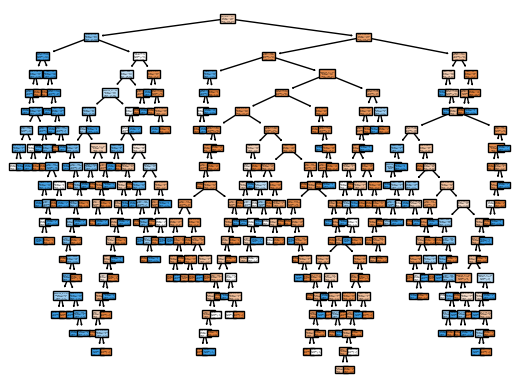

In [ ]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True)

In [ ]:
def draw_graphviz(graph):
    import re
    import ipywidgets as widgets
    from IPython.display import SVG, HTML
    from graphviz import Source

    graph = Source(graph)
    image = graph.pipe(format="svg")
    svg = SVG(image)
    svg_data = svg.data
    svg_data = re.sub(
        r'<svg xmlns=\"http://www\.w3\.org/2000/svg\" xmlns:xlink=\"http://www\.w3\.org/1999/xlink\" width=\"\d+pt\" height=\"\d+pt\"',
        '<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="100%" height="100%"',
        svg_data,
    )

    @widgets.interact(scale=widgets.IntSlider(min=30, max=500, step=1, value=100, description="Scale (%):", continuous_update=False))
    def _draw_svg(scale):
        return HTML('<div style="width: {width}%;">{svg}</div>'.format(width=scale, svg=svg_data))
    return _draw_svg

In [ ]:
graph = tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=["Died", "Survived"], filled=True)
draw_graphviz(graph)

interactive(children=(IntSlider(value=100, continuous_update=False, description='Scale (%):', max=500, min=30)…

<function __main__.draw_graphviz.<locals>._draw_svg(scale)>

OUR DECISION TREE IS SOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO LARGE!!!
IT'S BECAUSE OF OVERFITTING (OUR MODEL TRIED IT'S BEST TO GET 100% CORRECT RESULT)

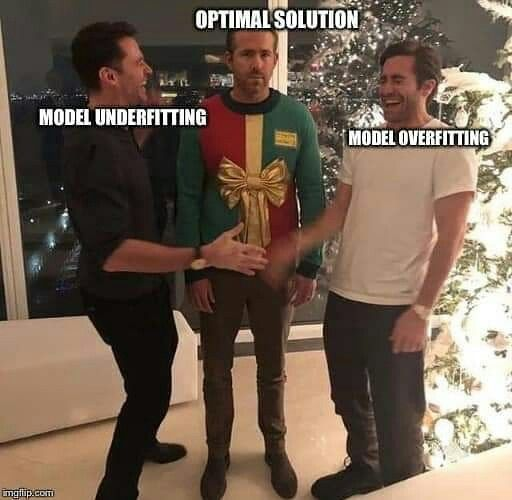

# Something like this:
**Imagine that we build 'x' and 'o' classification model.** <br>
**But we have a problem... 1 of 'o's is colse to 'x's** <br>
**So our model will build soooooo big tree to solve this problem with 100% accuracy** <br>

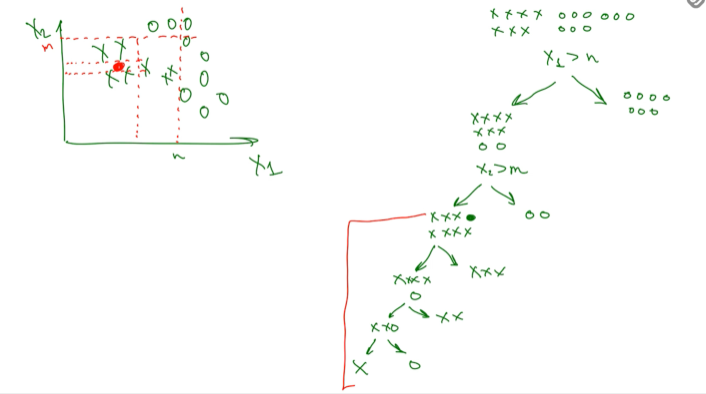

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.5,
                                                    random_state=42)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Name,,,,,,,,,,
"Hold, Mr. Stephen",2,44.0,1,0,26.0000,0,1,0,0,1
"Fortune, Miss. Mabel Helen",1,23.0,3,2,263.0000,1,0,0,0,1
"Bailey, Mr. Percy Andrew",2,18.0,0,0,11.5000,0,1,0,0,1
"Turpin, Mr. William John Robert",2,29.0,1,0,21.0000,0,1,0,0,1
"Nicola-Yarred, Master. Elias",3,12.0,1,0,11.2417,0,1,1,0,0


In [ ]:
X_train.shape

(445, 10)

In [ ]:
X_test.shape

(446, 10)

In [ ]:
clf.score(X, y)  # woow! 98% accuracy it's so...

0.9797979797979798

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)  # brooooo....
# overfitting moment

0.773542600896861

In [ ]:
# so we have to set limit on depth of tree:

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8139013452914798

In [ ]:
# UPD:
# for train_data:

max_depth_vals = range(1, 100 + 1)
max_score = 0
min_score = float('inf')

for val in max_depth_vals:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=val)
  clf.fit(X_train, y_train)
  max_score = max(max_score, clf.score(X_test, y_test))
  min_score = min(min_score, clf.score(X_test, y_test))


print(f'max: {max_score}\n--------\n')
print(f'min: {min_score}')


max: 0.8139013452914798
--------

min: 0.7668161434977578


In [ ]:
# for test_data:

max_depth_vals = range(1, 100 + 1)
max_score = 0
min_score = float('inf')

for val in max_depth_vals:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=val)
  clf.fit(X_train, y_train)
  max_score = max(max_score, clf.score(X_train, y_train))
  min_score = min(min_score, clf.score(X_train, y_train))


print(f'max: {max_score}\n--------\n')
print(f'min: {min_score}')


max: 0.9842696629213483
--------

min: 0.7842696629213484


In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
train_score = []
test_score = []
values = []
means = []

for val in max_depth_vals:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=val)
  clf.fit(X_train, y_train)
  test_score.append(clf.score(X_test, y_test))
  train_score.append(clf.score(X_train, y_train))
  values.append(val)
  means.append(cross_val_score(clf, X_train, y_train, cv=5).mean())


print(test_score)
print(values)

[0.7892376681614349, 0.7869955156950673, 0.8139013452914798, 0.804932735426009, 0.8026905829596412, 0.8071748878923767, 0.8071748878923767, 0.8004484304932735, 0.8004484304932735, 0.7959641255605381, 0.7982062780269058, 0.7982062780269058, 0.7959641255605381, 0.7892376681614349, 0.7713004484304933, 0.7847533632286996, 0.7869955156950673, 0.7802690582959642, 0.7757847533632287, 0.773542600896861, 0.7757847533632287, 0.773542600896861, 0.773542600896861, 0.7780269058295964, 0.7757847533632287, 0.7780269058295964, 0.7713004484304933, 0.773542600896861, 0.7757847533632287, 0.773542600896861, 0.7757847533632287, 0.7757847533632287, 0.7690582959641256, 0.773542600896861, 0.7713004484304933, 0.7690582959641256, 0.7757847533632287, 0.773542600896861, 0.7713004484304933, 0.773542600896861, 0.7690582959641256, 0.773542600896861, 0.773542600896861, 0.773542600896861, 0.7690582959641256, 0.773542600896861, 0.7780269058295964, 0.7713004484304933, 0.7780269058295964, 0.7757847533632287, 0.7690582959

In [ ]:
scores_df = pd.DataFrame({'max_depth': values,
                          'test_score': test_score,
                          'train_score': train_score,
                          'cross_val_mean': means})
scores_df.head()

,max_depth,test_score,train_score,cross_val_mean
0,1,0.789238,0.784270,0.784270
1,2,0.786996,0.804494,0.782022
2,3,0.813901,0.831461,0.826966
3,4,0.804933,0.851685,0.824719
4,5,0.802691,0.862921,0.831461


In [ ]:
# great, but I'd like to reformat this dataframe a bit...

scores_df = pd.melt(scores_df,
                    id_vars=['max_depth'],
                    value_vars=['train_score', 'test_score', 'cross_val_mean'],
                    var_name='set_type', value_name='score')

In [ ]:
scores_df

,max_depth,set_type,score
0,1,train_score,0.784270
1,2,train_score,0.804494
2,3,train_score,0.831461
3,4,train_score,0.851685
4,5,train_score,0.862921
...,...,...,...
295,96,cross_val_mean,0.788764
296,97,cross_val_mean,0.786517
297,98,cross_val_mean,0.779775
298,99,cross_val_mean,0.779775


In [ ]:
scores_df.head()

,max_depth,set_type,score
0,1,train_score,0.784270
1,2,train_score,0.804494
2,3,train_score,0.831461
3,4,train_score,0.851685
4,5,train_score,0.862921


In [ ]:
scores_df[scores_df['set_type'] == 'test_score']

,max_depth,set_type,score
100,1,test_score,0.789238
101,2,test_score,0.786996
102,3,test_score,0.813901
103,4,test_score,0.804933
104,5,test_score,0.802691
...,...,...,...
195,96,test_score,0.773543
196,97,test_score,0.771300
197,98,test_score,0.773543
198,99,test_score,0.775785


<Axes: xlabel='max_depth', ylabel='score'>

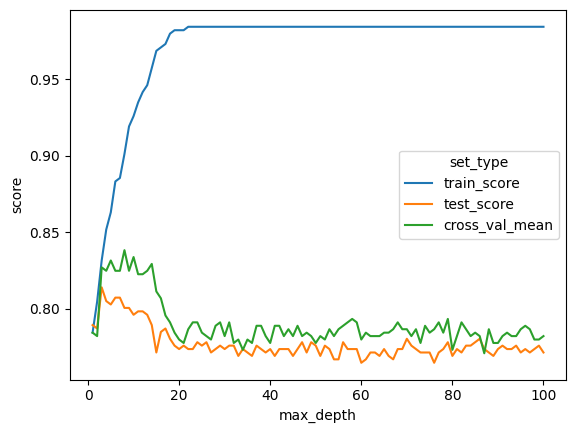

In [ ]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_df)

# **Example of our tree with max_depth = 3:**

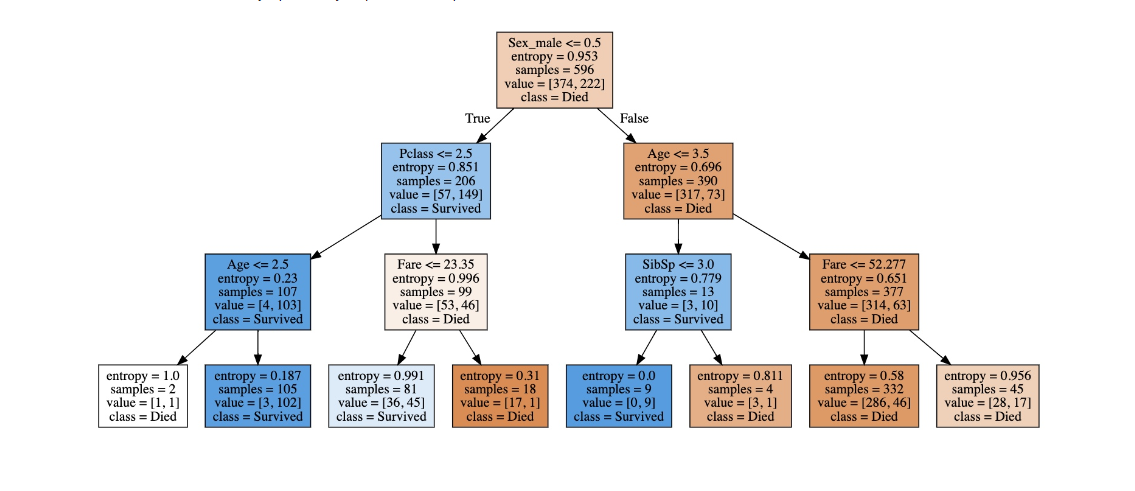

But this is a broot force way...
There is a better one...
We add validation dataset and apply cross validation not to check whole dataset everytime <br>

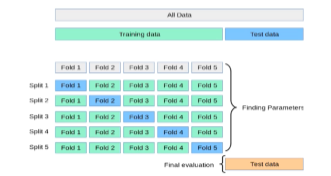

In [ ]:
scores_df[scores_df['set_type'] == 'cross_val_mean'].head(20)

,max_depth,set_type,score
200,1,cross_val_mean,0.784270
201,2,cross_val_mean,0.782022
202,3,cross_val_mean,0.826966
203,4,cross_val_mean,0.824719
204,5,cross_val_mean,0.831461
205,6,cross_val_mean,0.824719
206,7,cross_val_mean,0.824719
207,8,cross_val_mean,0.838202
208,9,cross_val_mean,0.824719
209,10,cross_val_mean,0.833708


In [ ]:
best_clf = scores_df[scores_df['set_type'] == 'cross_val_mean']
best_clf.head(20)

,max_depth,set_type,score
200,1,cross_val_mean,0.784270
201,2,cross_val_mean,0.782022
202,3,cross_val_mean,0.826966
203,4,cross_val_mean,0.824719
204,5,cross_val_mean,0.831461
205,6,cross_val_mean,0.824719
206,7,cross_val_mean,0.824719
207,8,cross_val_mean,0.838202
208,9,cross_val_mean,0.824719
209,10,cross_val_mean,0.833708


In [ ]:
x = scores_df[scores_df['set_type'] == 'cross_val_mean']

In [ ]:
best = x.loc[x['score'].idxmax()-1]['max_depth']
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.8094170403587444

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = tree.DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30 + 1)}
grid_search_cv_clf = GridSearchCV(clf, params, cv=5)

In [ ]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=None,
                                              splitter='best'),
             n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [ ]:
best_clf.score(X_test, y_test)

0.7982062780269058

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
preds = best_clf.predict(X_test)
precision_score(y_test, preds)

0.779874213836478

In [ ]:
recall_score(y_test, preds)

0.6927374301675978

In [ ]:
preds

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,

In [ ]:
pred_prob = best_clf.predict_proba(X_test)
pred_prob

<Axes: >

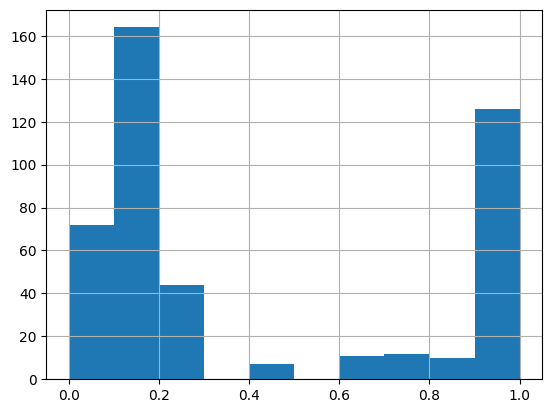

In [ ]:
pd.Series(pred_prob[:, 1]).hist()

In [ ]:
# now as we raised bar we get better precision_score
preds = np.where(pred_prob[:, 1] > 0.8, 1, 0)
precision_score(y_test, preds)

0.8412698412698413

In [ ]:
# but we lower our recall_score because of high bar
recall_score(y_test, preds)

0.5921787709497207

# **D E C I S I O N______T R E E . . .**
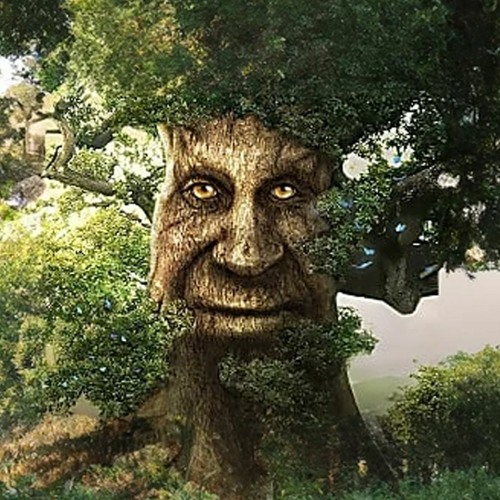